In [2]:
# General libraries:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Personal libraries:
# from robin_helperfunctions import round_to_hour
# from robinhoodstrategy import cryptoStrategy, BackcastStrategy, Trade

# Deep learning libraries:
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

## Build Strategy

In [3]:
import krakenex
from pykrakenapi import KrakenAPI

api = krakenex.API()
k = KrakenAPI(api)
api.load_key('kraken_keys.py')
df, last = k.get_ohlc_data('XETHZUSD', '240', ascending=True)
df.index = df.index.tz_localize(tz='UTC').tz_convert('US/Central')

FileNotFoundError: [Errno 2] No such file or directory: 'kraken_keys.py'

In [ ]:
df.head()

In [4]:
cnn_strategy = cryptoStrategy('simple_CNN_strategy')

In [24]:
model = load_model('4hr_6period_cnn.h5')
def entry_exit_func(hist_data, position_flag, trade=None):
    
    current_seq = np.array(hist_data.tail(12)[['close', 'open', 'high', 'low', 'volume', 'count']])
    pred = model.predict(current_seq.reshape(1,12,6))[0][0]
    
    ma_3 = hist_data['close'].rolling(3).mean()
    ma_8 = hist_data['close'].rolling(8).mean()
    
    if position_flag:
        if (ma_3[-1] <= ma_8[-1]):
            return 'sell'
        else:
            return 'pass'
    elif (pred > 0.5) & (ma_3[-1] >= ma_8[-1]):
            return 'buy'
    else:
        return 'pass'
cnn_strategy.add_entryExit_conditions(entry_exit_func)

In [25]:
backtest = BackcastStrategy(cnn_strategy)
backtest.set_parameters(1000, 'XETHZUSD', '240', 1, 12)
backtest.run_backcast()

Running backcast. Staring with $1000


In [26]:
backtest.trades

,trade_start,trade_end,peirods,time_held,buy_price,sell_price,pct_change,current_capital
0,2020-05-30 19:00:00-05:00,2020-05-31 07:00:00-05:00,2,0 days 12:00:00,237.55,233.78,-0.015870,984.129657
1,2020-06-01 03:00:00-05:00,2020-06-02 11:00:00-05:00,7,1 days 08:00:00,235.94,236.20,0.001102,985.214143
2,2020-06-03 11:00:00-05:00,2020-06-04 15:00:00-05:00,6,1 days 04:00:00,240.61,243.40,0.011596,996.638221
3,2020-06-06 07:00:00-05:00,2020-06-07 03:00:00-05:00,4,0 days 20:00:00,242.45,238.64,-0.015715,980.976470
4,2020-06-07 15:00:00-05:00,2020-06-09 03:00:00-05:00,8,1 days 12:00:00,244.90,243.40,-0.006125,974.968039
5,2020-06-09 23:00:00-05:00,2020-06-10 03:00:00-05:00,0,0 days 04:00:00,243.69,242.80,-0.003652,971.407279
6,2020-06-10 11:00:00-05:00,2020-06-11 07:00:00-05:00,4,0 days 20:00:00,246.93,238.71,-0.033289,939.070310
7,2020-06-12 11:00:00-05:00,2020-06-13 03:00:00-05:00,3,0 days 16:00:00,236.62,235.39,-0.005198,934.188827
8,2020-06-13 11:00:00-05:00,2020-06-14 03:00:00-05:00,3,0 days 16:00:00,236.95,236.09,-0.003629,930.798228
9,2020-06-15 15:00:00-05:00,2020-06-17 03:00:00-05:00,8,1 days 12:00:00,230.97,233.35,0.010304,940.389516


In [27]:
backtest.backcast_results()


                # Wins: 15

                Average Win: 0.05952956504913066

                # Losses: 41

                Average Loss: -0.015069038690654232

                Win %: 0.26785714285714285

                Overall return: 229.01769207117536

                Percent return: 0.22901769207117537

                


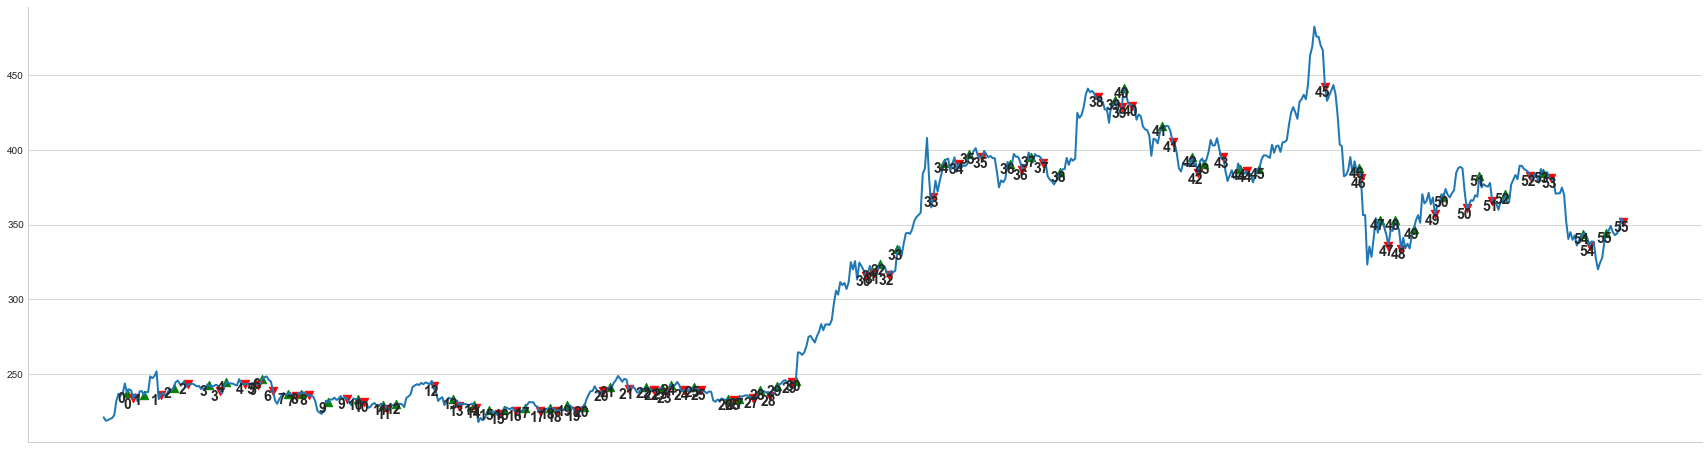

In [28]:
backtest.plot_trades()